# Sentiment Analysis of the 2020 US Elections around the Last Presidential Debate 


|Name|ANR|SNR|
|----|---|----|
|Jester Koldijk|937454|u1271994|
|Nick Nijenhuis|424361|u1265709|

###Introduction
For this assignment for the Course "Applied Economic Analysis 1: Python track", we will perform a sentiment analysis on the US elections of 2020. Specifically, we will look into the sentiment during the days before and after the last presedential debate before the election. We will analyze the sentiments using a machine learning package and Tweet data, which were scraped from Twitter using their API.

### Research Questions
**How do the sentiments on Twitter change before, during and after, the last presidential debate between Donald Trump and Joe Biden?**

a.	How does the overall sentiment change over the entire time period?

b.	How do the sentiments per candidate change over the entire time period? 

c.	How do the sentiments per candidate change specifically during the debate?

d.	How does the ratio of positive to total tweets change per day? (Based on methods from Ramteke et al. 2016)





### Motivation
The US elections have a significant influence on the United States because of the powerful position of a President. The elections also have a big influence on world politics, because the United States are one of the most influential countries in the world. Extensive polling and analysis is done each year, a social media sentiment analysis might be an additional tool to help more precisely predict the outcome. It should be mentioned that while doing this research, the election results will become clear shortly afterwards. 

### Method
1) We will first start by scraping data from Twitter using a developer account and the Twitter API. Specifically, we will scrape all tweets in English which include #Trump and/or #Biden.

2) After collecting the data, we will clean the data to prepare it for our analysis to answer the research questions.

3) Next match the tweet to a dummy for Biden or Trump

4) Subsequently perform a sentiment and subjectivity analysis on every tweet in the dataset

5) First provide summary statistics of the dataset in full, after which we will show summary statistics of data for Trump and Biden separately. 

6) Show trends in sentiment over time for the sentiment of the US elections (using both #Biden and #Trump as an indicator). Then show trends in sentiment over time for Trump and Biden separately and compare trends across our sample. 

7) Zoom in on the sentiment during the debate

8) Adopt a ratio of positive to total tweets per day to suggest a predictive measure of total votes per candidate as in Ramteke et al. (2016)

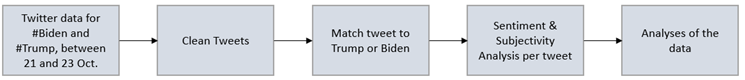

### Preview of the answers

There are overall slightly more positive sentiments on Twitter towards Joe Biden, which is visible throughout most of the time period. 

a. The overal sentiment (as a proxy for the US elections) is positive before, during and after the last presidential debate, showing a similar trend before and after the debate. In the hours before the debate, overall sentiment dropped, but increased as soon as the debate started. 

b. Biden showed a higher sentiment across our sample as compared to Trump. This indicates he has more positive tweets as opposed to negative tweets. 

c. During the debate the sentiment towards Biden increased faster than Trump's sentiment. Both are positive.

d. For 21 and 22 Oct. Biden has a higher positive to total tweet ratio, while Trump has a slightly higher ratio for Oct. 23.

### Assumptions and limitations
1) The Twitter API only allows us to scrape tweets from the previous 7 days. Therefore the amount of data was limited. Also, for computational limitations, we narrowed the amount of days around the debate. 

2) Most tweets did not contain a location, therefore we could not guarantee all tweets were from the US. To overcome this, we only include English tweets and assume both Trump and Biden have an equal amount of non-American tweets.

3) Retweets are filtered out because otherwise some tweets would be overrepresented in our data. 

4) We assume the Twitter population is representative for the US population

5) We limit ourselves to third-party developed tools for the sentiment and subjectivity analysis instead of developing one ourselves

6) It is to be noted, the sample of Trump contains more than twice as much tweets. We assume this is the case because Trump is currently the President of the USA and therefore receives more attention from Twitter users.

### Loading packages

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install plotly_express
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install stateplane
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install tweet_parser

import tweepy
from tweepy import API 
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re



### Scraping Tweets from Twitter

First we applied for a developers account from Twitter, this can be done if you want to do academic research or build an app with Twitter data. Once our application was approved we received four 'tokens' with which we could access the Twitter API through the Tweepy system, specially made for Python. Using Tweepy it is possible to search for tweets sent with a specific search term, in our case "#Trump" or "#Biden", between certain dates. Because it is not necessary to run these commands, we have included them as comments. For transparancy reasons in the data collection stage we decided to include them. 

First the four tokens are provided, which we received from Twitter

In [ ]:
"""
#The four tokens, these are marked with xxxx for privacy reasons.
ACCESS_TOKEN = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
ACCESS_TOKEN_SECRET = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
CONSUMER_KEY = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
CONSUMER_SECRET = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
"""

'\n#The four tokens, these are marked with xxxx for privacy reasons.\nACCESS_TOKEN = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"\nACCESS_TOKEN_SECRET = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"\nCONSUMER_KEY = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"\nCONSUMER_SECRET = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"\n'

Second these tokens are loaded into the Tweeypy API which handles the scraping of tweets.

In [ ]:
"""
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)
"""

'\nauth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)\nauth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)\n\napi = tweepy.API(auth)\n'

Next the scraping of tweets starts. First we make an empty dataframe, with the columns of which we want data. One tweet is loaded as a huge json file which has thousansds of lines of data, thus we need to filter what exactly we want. These variables are inserted in the dataframe for every tweet found based on the search terms. In addition we only use tweets from the english language, as we want to focus on tweets from the USA.

In [ ]:
"""
df=pd.DataFrame(columns=['Tweets', 'User', 'tweet_date', 'User_id', 'User_followers' ,'User_statuses' , 'User_verified', 'Likes','Retweets','user_location','source','reply','hashtag','length','truncated','tweet_id'])
# creating empty dataframe with needed columns

#create the stream function which loops through all the tweets found based on search terms and inserts them into the dataframe. Also add a counter to see how much tweets are already loaded. 
def stream(search, until, since):
    i=0
    for tweet in tweepy.Cursor(api.search, q=search, until=until, since=since, count=100, lang='en', tweet_mode="extended").items():
        print(i, end="\r")
        df.loc[i,"Tweets"]=tweet.full_text
        df.loc[i,"User"]=tweet.user.name
        df.loc[i,'tweet_date']=tweet.created_at
        df.loc[i,'User_id']=tweet.user.id
        df.loc[i,'User_followers']=tweet.user.followers_count
        df.loc[i,'User_statuses']=tweet.user.statuses_count
        df.loc[i,'User_verified']=tweet.user.verified
        df.loc[i,'Likes']=tweet.favorite_count
        df.loc[i,'Retweets']=tweet.retweet_count
        df.loc[i,'user_location']=tweet.user.location
        df.loc[i,'source']=tweet.source
        df.loc[i,'reply']=tweet.in_reply_to_status_id
        df.loc[i,'hashtag']=tweet.entities["hashtags"]
        df.loc[i,'length']=len(tweet.full_text)
        df.loc[i,'truncated']=tweet.truncated
        df.loc[i,'tweet_id']=tweet.id
        
        i+=1
        if i == 100000:
            break
        else:
            pass
"""

'\ndf=pd.DataFrame(columns=[\'Tweets\', \'User\', \'tweet_date\', \'User_id\', \'User_followers\' ,\'User_statuses\' , \'User_verified\', \'Likes\',\'Retweets\',\'user_location\',\'source\',\'reply\',\'hashtag\',\'length\',\'truncated\',\'tweet_id\'])\n# creating empty dataframe with needed columns\n\n#create the stream function which loops through all the tweets found based on search terms and inserts them into the dataframe. Also add a counter to see how much tweets are already loaded. \ndef stream(search, until, since):\n    i=0\n    for tweet in tweepy.Cursor(api.search, q=search, until=until, since=since, count=100, lang=\'en\', tweet_mode="extended").items():\n        print(i, end="\r")\n        df.loc[i,"Tweets"]=tweet.full_text\n        df.loc[i,"User"]=tweet.user.name\n        df.loc[i,\'tweet_date\']=tweet.created_at\n        df.loc[i,\'User_id\']=tweet.user.id\n        df.loc[i,\'User_followers\']=tweet.user.followers_count\n        df.loc[i,\'User_statuses\']=tweet.user.sta

Lastly we perform the search function based on the search term and the specific date. We did six searches, as the loading time increased severly when the total number of tweets increased. Thus we scraped:

*   #Biden for 3 days: 21, 22 and 23 Oct
*   #Trump for 3 days: 21, 22 and 23 Oct

An example of #trump for the 23th of Oct is presented below. In addition we add a filter such that we only get tweets tweeted by a person and retweets were filtered out. Lastly we save this data in an excel file.

In [ ]:
"""
stream(search="#trump" + "-filter:retweets", until="2020-10-24", since="2020-10-23")
df.to_excel('#Trump_23-10-2020.xlsx')
"""

'\nstream(search="#trump" + "-filter:retweets", until="2020-10-24", since="2020-10-23")\ndf.to_excel(\'#Trump_23-10-2020.xlsx\')\n'

### Loading dataset

This dataset already contains all scraped tweets, which have been combined into a single Excel file. Note that we have obtained these tweets using the code of the previous section.

In [ ]:
#Load dataset with all scraped tweets
df_all = pd.read_excel("df_final_v2.xlsx")


### Data cleaning

In [ ]:
#Define classes for cleaning our data and analyzing sentiment/subjectivity

#Class to clean tweets and remove text which is not useful for analysis
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

#Class to analyze the sentiment of tweets, either positive, neutral or negative
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

#Class to analyze the subjectivity of tweets, either subjective, neutral or not subjective
def analyze_subjectivity(tweet):
    analysis = TextBlob(tweet)
        
    if analysis.sentiment.subjectivity > 0:
        return 1
    elif analysis.sentiment.subjectivity == 0:
        return 0
    else:
        return -1 

#Class to analyze sentiment on a scale of -1 (negative) to 1 (positive)
def analyze_sentiment_d(tweet):
    analysis = TextBlob(clean_tweet(tweet))
        
    return analysis.sentiment.polarity

#Class to analyze subjectivity on a scale of -1 (not subjective) to 1 (subjective)
def analyze_subjectivity_d(tweet):
    analysis = TextBlob(clean_tweet(tweet))
        
    return analysis.sentiment.subjectivity 

In [ ]:
#Reset the indexation of our dataframe
df_all = df_all.reset_index()
df_all.head()

#Delete unncessary index columns
del df_all['level_0']
del df_all['Unnamed: 0']

The total dataset contains 96.087 observations.

In [ ]:
#Creating dummies if biden or trump is used as hashtag

k=0
for list in df_all['hashtag']:
    if "trump" in list.lower():
        df_all.loc[df_all.index[k], 'dummy_tru'] = 1
    else: 
        df_all.loc[df_all.index[k], 'dummy_tru'] = 0

    if "biden" in list.lower():
        df_all.loc[df_all.index[k], 'dummy_bid'] = 1
    else:
        df_all.loc[df_all.index[k], 'dummy_bid'] = 0

    if  "trump" in list.lower() and "biden" in list.lower():
        df_all.loc[df_all.index[k], 'dummy_both'] = 1  
    else: 
        df_all.loc[df_all.index[k], 'dummy_both'] = 0
    print(k, end="\r")    
    k+=1
    

In [ ]:
#Clean tweets
df_all['Tweets'] = df_all['Tweets'].astype(str)
df_all['clean_tweet'] = df_all['Tweets'].apply(lambda x: clean_tweet(x))

### Sentiment and subjectivity Analysis

In [ ]:
#Sentiment analysis
df_all['Sentiment_d'] = df_all['clean_tweet'].apply(lambda x: analyze_sentiment_d(x)) #Decimal number between -1(negative) and +1(positive)
df_all['Sentiment'] = df_all['clean_tweet'].apply(lambda x: analyze_sentiment(x)) #Positive (1), Neutral (0) and Negative (-1)

In [ ]:
#Check whether the cleaning/sentiment analysis of tweets worked properly by checking a random row

n=8425
print('Original tweet:\n'+ df_all['Tweets'][n])
print()
print('Clean tweet:\n'+df_all['clean_tweet'][n])
print()
print('Sentiment:\n'+df_all['Sentiment'][n])

Original tweet:
2/ #Trump likes to blame #China &amp; call #COVID19 the #ChinaVirus. Here's a bit of news--we know novel infections come from China &amp; we know China likes to get bad news as much as Trump. That's why we have a @CDCgov office in Beijing, to surveil China ourselves. But guess what.

Clean tweet:
2 Trump likes to blame China amp call COVID19 the ChinaVirus Here s a bit of news we know novel infections come from China amp we know China likes to get bad news as much as Trump That s why we have a office in Beijing to surveil China ourselves But guess what

Sentiment:
Negative


In [ ]:
#Constructing dummy variables for positive, negative and neutral sentiment in the total df
df_all.loc[df_all['Sentiment'] == "Positive", 'pos_senti'] = 1
df_all.loc[df_all['Sentiment'] == "Neutral", 'neu_senti'] = 1
df_all.loc[df_all['Sentiment'] == "Negative", 'neg_senti'] = 1

#If NA, then determine the tweet to be neutral.
df_all['pos_senti'] = df_all['pos_senti'].fillna(0)
df_all['neu_senti'] = df_all['neu_senti'].fillna(0)
df_all['neg_senti'] = df_all['neg_senti'].fillna(0)

df_all.head(2)

,index,Tweets,User,tweet_date,User_id,User_followers,User_statuses,User_verified,Likes,Retweets,user_location,source,reply,hashtag,length,truncated,tweet_id,dummy_tru,dummy_bid,dummy_both,clean_tweet,Sentiment_d,Sentiment,pos_senti,neu_senti,neg_senti
0,0,"John Ratcliffe, Director of National Intellige...",Paul Hawkins,2020-10-21 23:59:54,151014101,1413,5794,False,1,2,"Essex, London, Surrey",Twitter Web App,NaN,"[{'text': 'election', 'indices': [207, 216]}, ...",268,False,1319065908355150080,1.0,1.0,1.0,John Ratcliffe Director of National Intelligen...,-0.100000,Negative,0.0,0.0,1.0
1,1,Their is so much video and memes going around ...,fitnessfighter 🇺🇸,2020-10-21 23:59:52,2727319114,645,2023,False,0,0,Binghamton NY,Twitter Web App,NaN,"[{'text': 'Trump', 'indices': [197, 203]}]",209,False,1319065901354917888,1.0,0.0,0.0,Their is so much video and memes going around ...,0.168182,Positive,1.0,0.0,0.0


In [ ]:
#Subjectivity analysis
df_all['Subjectivity'] = df_all['clean_tweet'].apply(lambda x: analyze_subjectivity(x)) #Decimal number between -1 and +1.
df_all['Subjectivity_d']=df_all['clean_tweet'].apply(lambda x: analyze_subjectivity_d(x)) #Subjective (1), Not subjective (0) 

In [ ]:
df_all.head(2)

,index,Tweets,User,tweet_date,User_id,User_followers,User_statuses,User_verified,Likes,Retweets,user_location,source,reply,hashtag,length,truncated,tweet_id,dummy_tru,dummy_bid,dummy_both,clean_tweet,Sentiment_d,Sentiment,pos_senti,neu_senti,neg_senti,Subjectivity,Subjectivity_d
0,0,"John Ratcliffe, Director of National Intellige...",Paul Hawkins,2020-10-21 23:59:54,151014101,1413,5794,False,1,2,"Essex, London, Surrey",Twitter Web App,NaN,"[{'text': 'election', 'indices': [207, 216]}, ...",268,False,1319065908355150080,1.0,1.0,1.0,John Ratcliffe Director of National Intelligen...,-0.100000,Negative,0.0,0.0,1.0,1,0.200000
1,1,Their is so much video and memes going around ...,fitnessfighter 🇺🇸,2020-10-21 23:59:52,2727319114,645,2023,False,0,0,Binghamton NY,Twitter Web App,NaN,"[{'text': 'Trump', 'indices': [197, 203]}]",209,False,1319065901354917888,1.0,0.0,0.0,Their is so much video and memes going around ...,0.168182,Positive,1.0,0.0,0.0,1,0.327273


### Summary statistics total dataset

First some information about the various variables is presented.

In [ ]:
#Create info table
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96087 entries, 0 to 96086
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           96087 non-null  int64         
 1   Tweets          96087 non-null  object        
 2   User            96086 non-null  object        
 3   tweet_date      96087 non-null  datetime64[ns]
 4   User_id         96087 non-null  int64         
 5   User_followers  96087 non-null  int64         
 6   User_statuses   96087 non-null  int64         
 7   User_verified   96087 non-null  bool          
 8   Likes           96087 non-null  int64         
 9   Retweets        96087 non-null  int64         
 10  user_location   68211 non-null  object        
 11  source          95786 non-null  object        
 12  reply           21703 non-null  float64       
 13  hashtag         96087 non-null  object        
 14  length          96087 non-null  int64         
 15  tr

Next for several interesting statistics a summary is presented with mean, standard deviation, percentiles, minimum and maximum values.

In [ ]:
#Create summary statistics for the following variables:
df_all[["Retweets","Likes","length","User_followers","User_statuses","User_verified","dummy_tru","dummy_bid","dummy_both","Sentiment_d","Subjectivity_d"]].describe()

,Retweets,Likes,length,User_followers,User_statuses,dummy_tru,dummy_bid,dummy_both,Sentiment_d,Subjectivity_d
count,96087.000000,96087.000000,96087.000000,9.608700e+04,9.608700e+04,96087.000000,96087.000000,96087.000000,96087.000000,96087.000000
mean,1.518468,5.262283,176.871783,7.746727e+03,4.155404e+04,0.797132,0.541832,0.339026,0.046185,0.363183
std,32.598935,120.095909,83.612101,1.050481e+05,1.520054e+05,0.402137,0.498250,0.473381,0.276969,0.309613
min,0.000000,0.000000,11.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,107.000000,9.500000e+01,2.142500e+03,1.000000,0.000000,0.000000,-0.016667,0.000000
50%,0.000000,0.000000,167.000000,4.640000e+02,9.019000e+03,1.000000,1.000000,0.000000,0.000000,0.381944
75%,0.000000,1.000000,256.000000,2.037000e+03,3.148300e+04,1.000000,1.000000,1.000000,0.171429,0.584048
max,5135.000000,22642.000000,983.000000,1.053058e+07,3.668438e+06,1.000000,1.000000,1.000000,1.000000,1.000000


To present some more information about the subjectivity and sentiment we present a heatmap, as this also shows the density. It becomes clear that there is a clear spike at (0,0) as in that case the algorithm does not predict anything about the tweet. In addition we see that the more extreme the sentiment is, or more towards -1 or +1 the subjectivity also increases. In addition the most tweets are in the lower middle of the graph, indicating that these are moderately positive or negative and moderately subjective.


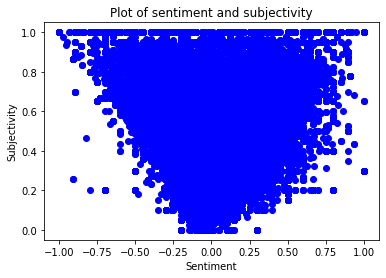

In [ ]:
# Plot the sentiment and subjectivity
plt.scatter(df_all['Sentiment_d'], df_all['Subjectivity_d'], color = 'Blue')
    
plt.title('Plot of sentiment and subjectivity')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')
plt.show()

Text(0, 0.5, 'subjectivity')

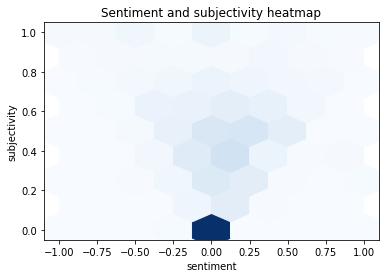

In [ ]:
# Heatmap to show the distribution 
plt.hexbin(df_all["Sentiment_d"], df_all["Subjectivity_d"], gridsize=8, cmap='Blues')

plt.title("Sentiment and subjectivity heatmap")
plt.xlabel("sentiment")
plt.ylabel("subjectivity")


Next we plot for the relationship between the followers of a user and tweets posted by a user, by the verification status. We use a double log scale as the absolute values for the number of followers and statuses differe a lot between users.

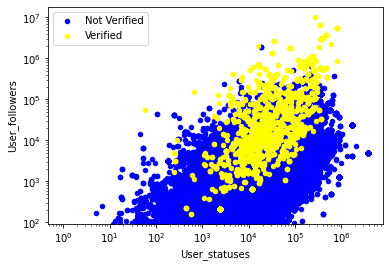

In [ ]:
ax = df_all[(df_all['User_verified'] == False)].plot(kind='scatter', x='User_statuses', y='User_followers', color='Blue', label='Not Verified', loglog=True)  
df_all[(df_all['User_verified'] == True)].plot(kind='scatter', x='User_statuses', y='User_followers', color='Yellow', label='Verified', loglog=True, ax=ax)

From this graph we observe that there is a positive relationship between the number of followers and the number of tweets (statuses) posted. Also verified users have on average more followers. Next, we will plot the distribution of total positive, neutral and negative tweets.

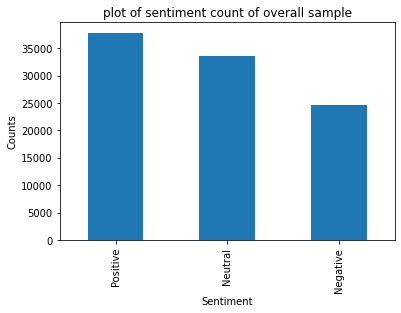

In [ ]:
#Show the value count
df_all['Sentiment'].value_counts()

#Plot and visualize the counts
plt.title('plot of sentiment count of overall sample')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_all['Sentiment'].value_counts().plot(kind='bar')

plt.show()

### Summary Statistics Trump versus Biden
#### Creating separate dataframes for Trump and Biden

In [ ]:
df2 = df_all
df2.index = pd.to_datetime(df2['tweet_date'])

In [ ]:
#First, we need to create separate dataframes for both #Biden and #Trump
df_biden = df2
df_trump = df2

In [ ]:
#Now we need to filter the full dataset for hashtags
#Only include tweets in datasets for respectively Biden and Trump which include their hastag
df_biden = df_biden[df_biden.dummy_bid != 0]
df_trump = df_trump[df_trump.dummy_tru != 0]

#Delete tweets which have both Biden and Trump as a hashtag
df_biden = df_biden[df_biden.dummy_both == 0]
df_trump = df_trump[df_trump.dummy_both == 0]

In [ ]:
#Summary statistics for Trump
df_trump[["Retweets","Likes","length","User_followers","User_statuses","User_verified","dummy_tru","dummy_bid", "dummy_both","Sentiment_d","Subjectivity_d"]].describe()

,Retweets,Likes,length,User_followers,User_statuses,dummy_tru,dummy_bid,dummy_both,Sentiment_d,Subjectivity_d
count,44018.000000,44018.000000,44018.000000,4.401800e+04,4.401800e+04,44018.0,44018.0,44018.0,44018.000000,44018.000000
mean,1.457086,5.110023,171.053637,6.534870e+03,5.573462e+04,1.0,0.0,0.0,0.032696,0.372341
std,31.898996,107.677847,86.162610,7.731732e+04,2.114432e+05,0.0,0.0,0.0,0.285829,0.309071
min,0.000000,0.000000,11.000000,0.000000e+00,1.000000e+00,1.0,0.0,0.0,-1.000000,0.000000
25%,0.000000,0.000000,100.000000,1.050000e+02,2.819250e+03,1.0,0.0,0.0,-0.050000,0.000000
50%,0.000000,0.000000,157.000000,5.120000e+02,1.213000e+04,1.0,0.0,0.0,0.000000,0.400000
75%,0.000000,1.000000,251.000000,2.180000e+03,4.165400e+04,1.0,0.0,0.0,0.161215,0.600000
max,5135.000000,14264.000000,983.000000,5.397616e+06,3.668438e+06,1.0,0.0,0.0,1.000000,1.000000


In [ ]:
#Summary statistics Biden
df_biden[["Retweets","Likes","length","User_followers","User_statuses","User_verified","dummy_tru","dummy_bid","dummy_both","Sentiment_d","Subjectivity_d"]].describe()

,Retweets,Likes,length,User_followers,User_statuses,dummy_tru,dummy_bid,dummy_both,Sentiment_d,Subjectivity_d
count,19487.000000,19487.000000,19487.000000,1.948700e+04,1.948700e+04,19487.0,19487.0,19487.0,19487.000000,19487.000000
mean,1.978960,7.230513,160.006209,8.486042e+03,3.218007e+04,0.0,1.0,0.0,0.054874,0.342175
std,46.303525,197.630106,85.466789,1.000192e+05,7.057530e+04,0.0,0.0,0.0,0.265693,0.310055
min,0.000000,0.000000,11.000000,0.000000e+00,1.000000e+00,0.0,1.0,0.0,-1.000000,0.000000
25%,0.000000,0.000000,89.000000,1.040000e+02,2.274500e+03,0.0,1.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,143.000000,4.940000e+02,8.977000e+03,0.0,1.0,0.0,0.000000,0.343750
75%,0.000000,1.000000,234.000000,2.132000e+03,2.916950e+04,0.0,1.0,0.0,0.176361,0.558887
max,4277.000000,22642.000000,937.000000,3.748640e+06,1.202953e+06,0.0,1.0,0.0,1.000000,1.000000


We have now created dataframes for tweets with hashtags for respectively Trump and Biden and deleted Tweets which include both hashtags. After this procedure, Trump has more than twice as much observations as compared to Biden over the sample period (44018 versus 19487). We will now shortly introduce some summary statistics for the Biden and Trump dataframes. 

#### Summary statistics for Biden dataframe

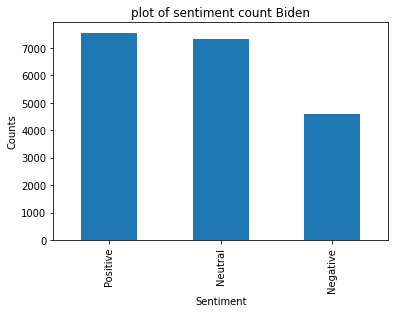

In [ ]:
#Plot of sentiment count for Biden
plt.title('plot of sentiment count Biden')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_biden['Sentiment'].value_counts().plot(kind='bar')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


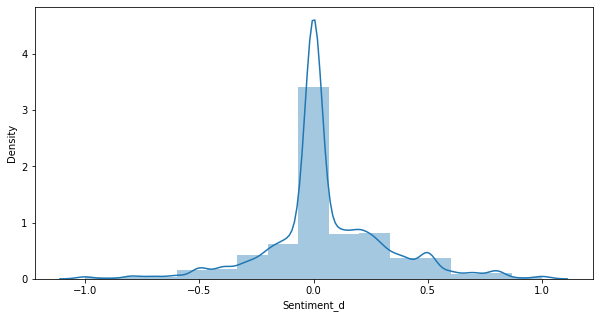

In [ ]:
#Density plot sentiment analysis Biden
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df_biden['Sentiment_d'], bins=15, ax=ax)
plt.show()

#### Summary statistics for Trump dataframe

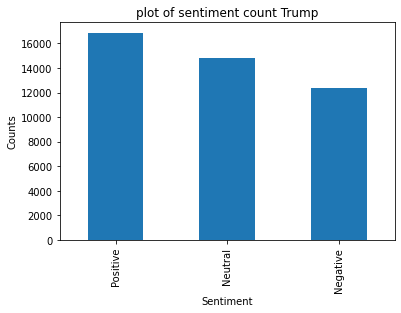

In [ ]:
#Plot of sentiment count for Trump

#Show the value count
df_trump['Sentiment'].value_counts()

#Plot and visualize the counts
plt.title('plot of sentiment count Trump')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_trump['Sentiment'].value_counts().plot(kind='bar')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


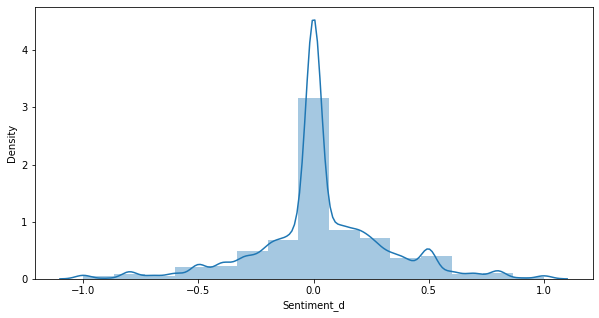

In [ ]:
#Density plot sentiment analysis Trump
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df_trump['Sentiment_d'], bins=15, ax=ax)
plt.show()

For Trump and Biden, we observe similar distributions for the amount of positive, neutral and negative sentiment tweets on average. Looking at the respective density plots, we see that the distribution is a little biased towards a sentiment close to 0. We note that this might also be due to the use of this specific tool to analyze the sentiment (TextBlob package). 

### Analysis
#### Full dataset

We will first analyze the full dataset to observe the overall trend during the US elections across our sample. We take tweets with #Biden and #Trump as an indicator for the sentiment analysis of the US elections on Twitter.

In [ ]:
df2=df_all
#Fix indexing
df2.index = pd.DatetimeIndex(df2["tweet_date"])
df2 = df2.sort_index()

In [ ]:
#Create variables for the expanding mean and rolling mean of the full dataset
df2['mean'] = df2['Sentiment_d'].expanding().mean()
df2['rolling_2h'] = df2['Sentiment_d'].rolling('2h').mean()

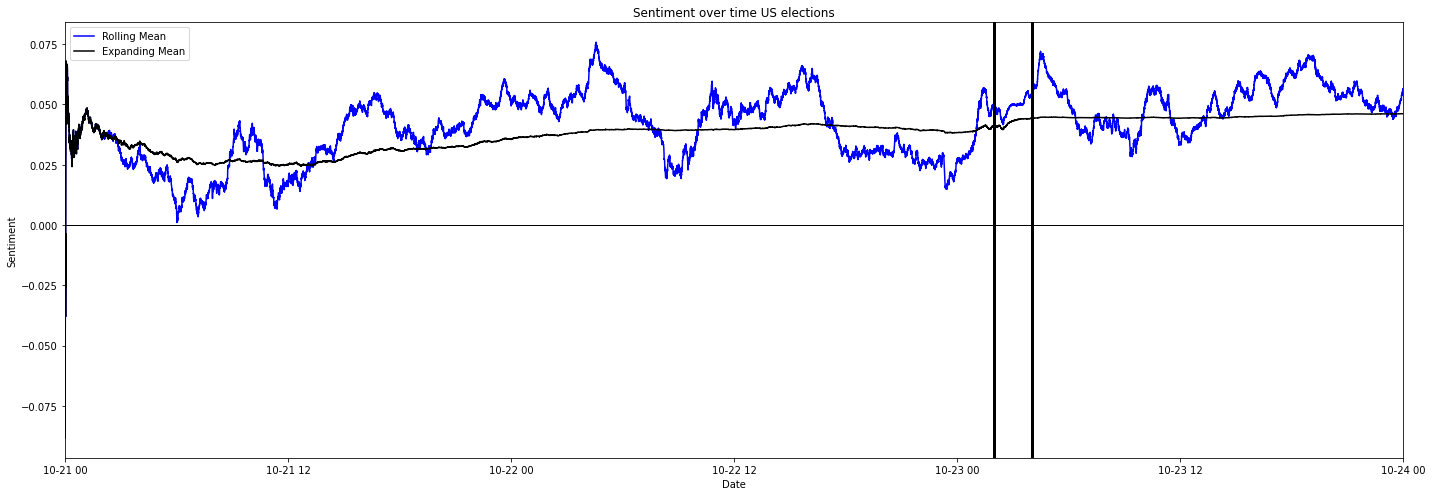

In [ ]:
#Plot sentiment over time
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
#ax.scatter(df2['tweet_date'],df2['Sentiment_d'], label='Tweet Sentiment')
ax.plot(df2['tweet_date'],df2['rolling_2h'], color ='blue', label='Rolling Mean')
ax.plot(df2['tweet_date'],df2['mean'], color='black', label='Expanding Mean')
ax.set_xlim([dt.date(2020,10,21),dt.date(2020,10,24)])
ax.set(title='Sentiment over time US elections', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()

#Neutral sentiment
ax.axhline(y=0, linewidth=1, color='black')

#Debate was from 02:00 GMT to 04:00 GMT on 23st of october
ax.axvline(x=dt.datetime(2020,10,23,2), linewidth=3, color='black')
ax.axvline(x=dt.datetime(2020,10,23,4), linewidth=3, color='black')

plt.show()

In the graph above we show the average sentiment over time across our sample where we use a moving average to smooth out short-term fluctuations. The two vertical black lines indicate the latest presidential debate on 22th October. For this, we note that dates from tweets are noted in GMT, where the debate took place at October 23th from 2:00 to 3:30 GMT. From this graph we observe the overall sentiment of elections has not changed dramatically because of the debate. However, we see an increase in the day before the debate, indicating possible negative expectations for the debate. Given that the public in general had a negative opinion about the presidential debate before this one, indicates that people might have expected a similar debate as the previous one. During the debate the overall sentiment increased and returned back to the trend as in the days before the debate, so in the long run, the debate does not seem to affect the sentiment of the US elections significantly.

#### Trump versus Biden

In [ ]:
#Fix indexing
df_biden.index = pd.to_datetime(df_biden['tweet_date'])
df_biden = df_biden.sort_index()

df_trump.index = pd.to_datetime(df_trump['tweet_date'])
df_trump = df_trump.sort_index()

In [ ]:
#Create variables for the expanding mean and rolling mean for both Trump and Biden dataframes
df_biden['mean'] = df_biden['Sentiment_d'].expanding().mean() 
df_biden['rolling_2h'] = df_biden['Sentiment_d'].rolling('2h').mean() 

df_trump['mean'] = df_trump['Sentiment_d'].expanding().mean()
df_trump['rolling_2h'] = df_trump['Sentiment_d'].rolling('2h').mean()

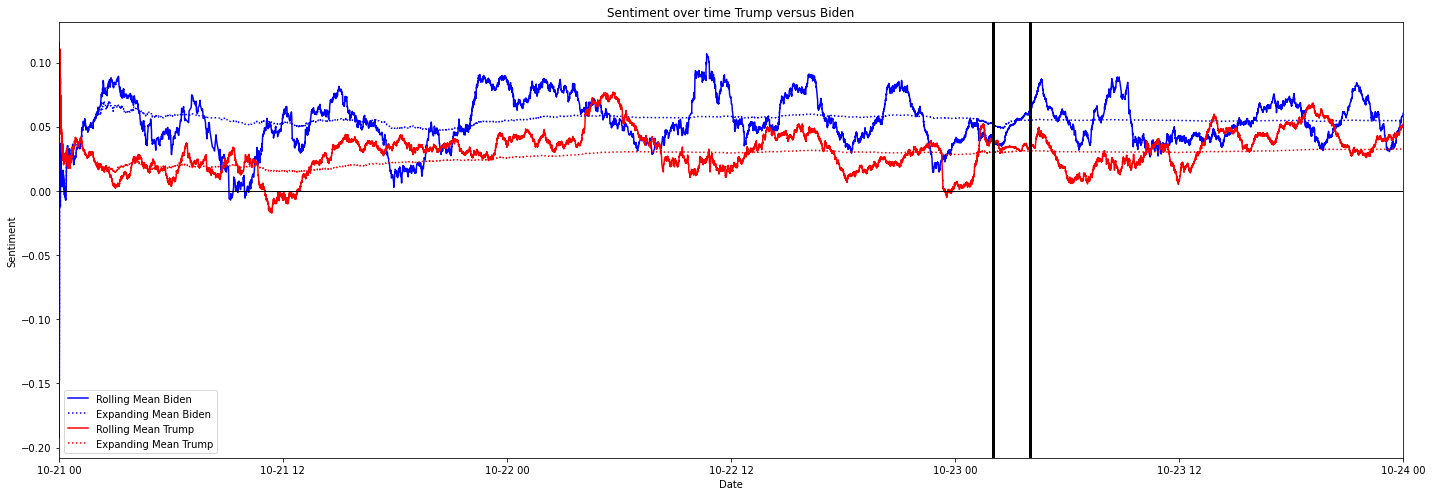

In [ ]:
#Plot sentiment over time
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
#ax.scatter(df2['tweet_date'],df2['Sentiment_d'], label='Tweet Sentiment')
ax.plot(df_biden['tweet_date'],df_biden['rolling_2h'], color ='b', label='Rolling Mean Biden')
ax.plot(df_biden['tweet_date'],df_biden['mean'], color='b', label='Expanding Mean Biden', linestyle="dotted")

ax.plot(df_trump['tweet_date'],df_trump['rolling_2h'], color ='r', label='Rolling Mean Trump')
ax.plot(df_trump['tweet_date'],df_trump['mean'], color='r', label='Expanding Mean Trump', linestyle="dotted")

ax.set_xlim([dt.date(2020,10,21),dt.date(2020,10,24)])
ax.set(title='Sentiment over time Trump versus Biden', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()

#Debate was from 02:00 GMT to 04:00 GMT on 23st of october
ax.axvline(x=dt.datetime(2020,10,23,2), linewidth=3, color='black')
ax.axvline(x=dt.datetime(2020,10,23,4), linewidth=3, color='black')

#Neutral sentiment
ax.axhline(y=0, linewidth=1, color='black')

plt.show()

A limitation of our data is that a very limited amount of tweets had a given location, therefore we could not identify which country most tweets are from. However, because we only extracted tweets in English, we assume both the dataframes for Trump and Biden to contain on average the same amount of non-American tweets. This should therefore not influence our analysis. 

From the graph above we observe that Biden has a more positive sentiment around the last debate as compared to Trump. Similar to the analysis of the whole sample, the trend after the debate is similar to the trend in the days before the debate. We take from this that the debate has no large influences on sentiments for both Trump and Biden. Changing the parameters of the rolling mean does not change this finding.

The drop in sentiment in the hours prior to the debate seem to mainly been driven by a negative sentiment for Trump according to our sample, whereas Biden shows an upward sentiment before the debate. Also in the morning after the debate, Biden saw a spike in sentiment. This however did not have a structural effect as described earlier. Changing our parameters for the rolling mean does not change these findings.

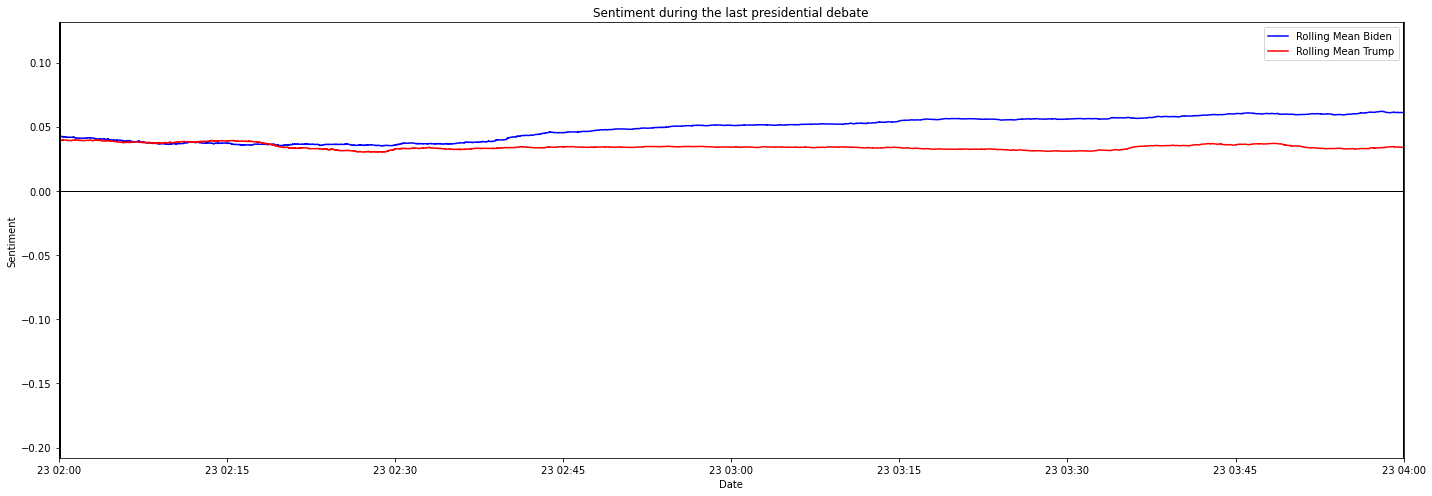

In [ ]:
#Zoom into the debate

#Plot sentiment over time
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
#ax.scatter(df2['tweet_date'],df2['Sentiment_d'], label='Tweet Sentiment')
ax.plot(df_biden['tweet_date'],df_biden['rolling_2h'], color ='b', label='Rolling Mean Biden')
ax.plot(df_trump['tweet_date'],df_trump['rolling_2h'], color ='r', label='Rolling Mean Trump')

ax.set_xlim([dt.datetime(2020,10,23,2),dt.datetime(2020,10,23,4)])
ax.set(title='Sentiment during the last presidential debate', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()

#Debate was from 02:00 GMT to 03:30 GMT on 23st of october
ax.axvline(x=dt.datetime(2020,10,23,2), linewidth=3, color='black')
ax.axvline(x=dt.datetime(2020,10,23,4), linewidth=3, color='black')

#Neutral sentiment
ax.axhline(y=0, linewidth=1, color='black')

plt.show()

During the debate the sentiment clearly increased for Biden, whereas the sentiment for Trump remained fairly constant. This suggests the US public had a more positive sentiment towards Biden during the debate. The sentiment for Biden was even twice as high as compared to the start of the debate.

### Analysis of the ratio positive sentiment to total tweets

Ramteke et al. (2016) propose a smiliar method in which they try to predict the election results between Clinton & Trump in 2016. They used a similar methodology, namely using public searches for Clinton and Trump on twitter, cleaning these and using an algorithm to predict the sentiment. Next they adopt a ratio of positive to total tweets to suggest a predictive measure of total votes per candidate. 

In our opinion, and also in the opinion of the original authors, this evidently is not a full prediction. However, it is insightful to see the percentage of positive tweets for a specific candidate as this could be a proxy for voting behavior. 

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7823280&casa_token=jczYxMSJfioAAAAA:05LLx8-5ZnQMQLppySFe32-77hQXMUMcv36u4LfMc__n76AZseJ50x5ksUjJIfC2QMCuGEK1rZ9Dow

Therefore, we first construct a table which calculates the ratio of positive to total tweets, per candidate and per day as in their analysis. Next we use this to plot a bar chart per candidate and per day to find insights. 

In [ ]:
#First filter the original dataframe, such that we construct df which only has tweets with a hashtag of 1 candidate.
df_bid_both = df_all[df_all['dummy_bid'] == 1]
df_bid = df_bid_both[df_bid_both['dummy_both'] == 0]

#Construct days
df_bid['tweet_date'] = pd.to_datetime(df_bid['tweet_date'])
df_bid['day'] = df_bid.tweet_date.dt.day

df_tru_both = df_all[df_all['dummy_tru'] == 1]
df_tru = df_tru_both[df_tru_both['dummy_both'] == 0]

df_tru['tweet_date'] = pd.to_datetime(df_tru['tweet_date'])
df_tru['day'] = df_tru.tweet_date.dt.day

#Fill the variables per day with the sum of total tweets
T_bid_21 = df_bid[df_bid["day"]==21]['dummy_bid'].sum()
T_bid_22 = df_bid[df_bid["day"]==22]['dummy_bid'].sum()
T_bid_23 = df_bid[df_bid["day"]==23]['dummy_bid'].sum()

#Fill the variables per day with the sum of Positive tweets
P_bid_21 = df_bid[df_bid["day"]==21]['pos_senti'].sum()
P_bid_22 = df_bid[df_bid["day"]==22]['pos_senti'].sum()
P_bid_23 = df_bid[df_bid["day"]==23]['pos_senti'].sum()

#Fill the variables per day with the ratio of pos/tot tweets
R_bid_21 = "{:.2%}".format(P_bid_21 / T_bid_21)
R_bid_22 = "{:.2%}".format(P_bid_22 / T_bid_22)
R_bid_23 = "{:.2%}".format(P_bid_23 / T_bid_23)

#Same for trump
T_tru_21 = df_tru[df_tru["day"]==21]['dummy_tru'].sum()
T_tru_22 = df_tru[df_tru["day"]==22]['dummy_tru'].sum()
T_tru_23 = df_tru[df_tru["day"]==23]['dummy_tru'].sum()

P_tru_21 = df_tru[df_tru["day"]==21]['pos_senti'].sum()
P_tru_22 = df_tru[df_tru["day"]==22]['pos_senti'].sum()
P_tru_23 = df_tru[df_tru["day"]==23]['pos_senti'].sum()

R_tru_21 = "{:.2%}".format(P_tru_21 / T_tru_21)
R_tru_22 = "{:.2%}".format(P_tru_22 / T_tru_22)
R_tru_23 = "{:.2%}".format(P_tru_23 / T_tru_23)

#Construct dataframe to show the table
d = {'Date': np.array(["21/10", "22/10","23/10"]), 
     'Tot_bid': np.array([T_bid_21, T_bid_22, T_bid_23]), 
     'Pos_bid': np.array([P_bid_21, P_bid_22, P_bid_23]),
     'Perc_bid': np.array([R_bid_21, R_bid_22, R_bid_23]), 
     'Tot_tru': np.array([T_tru_21, T_tru_22, T_tru_23]), 
     'Pos_tru': np.array([P_tru_21, P_tru_22, P_tru_23]),
     'Perc_tru': np.array([R_tru_21, R_tru_22, R_tru_23])}
senti_perCan_perDay = pd.DataFrame(data=d)
senti_perCan_perDay

#Construct dataframe which has the unformatted (not in percentage, string type) ratio's. As these are needed for calculation, bot look less clear in a table.
d2 = {'Date': np.array(["21/10", "22/10","23/10"]), 
     'Perc_bid': np.array([P_bid_21 / T_bid_21, P_bid_22 / T_bid_22, P_bid_23 / T_bid_23]), 
     'Perc_tru': np.array([P_tru_21 / T_tru_21, P_tru_22 / T_tru_22, P_tru_23 / T_tru_23])}
senti_graph = pd.DataFrame(data=d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Next a bar chart is constructed which shows the plots of the graph depicted above, this is to show this visually. 

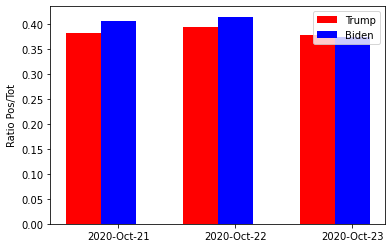

In [ ]:
# we want 3 days (N=3)
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

#use the unformatted (not string type) ratios
Trump = senti_graph["Perc_tru"]
rects1 = ax.bar(ind, Trump, width, color='r')
Biden = senti_graph["Perc_bid"]
rects2 = ax.bar(ind+width, Biden, width, color='b')

#clarify the graph
ax.set_ylabel('Ratio Pos/Tot')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2020-Oct-21','2020-Oct-22','2020-Oct-23') )
ax.legend( (rects1[0], rects2[0]), ('Trump', 'Biden') )

plt.show()

Thus according to this graph we can conclude that the sentiments are slightly more positive for Biden than for Trump for the first two days (prior and during the debate), however after the debate the ratio of positive sentiments is slightly higher for Trump. Interestingly, these sentiments are close to eachother. 

### Sensititivy Analysis

As a sensitivity analysis, we will show results of our analysis using different parameters for the rolling mean. These results are summarized below:

#### Full dataset

In [ ]:
#Create extra variables for the expanding mean using different parameters
df2['rolling_4h'] = df2['Sentiment_d'].rolling('4h').mean() #4 hour rolling mean
df2['rolling_8h'] = df2['Sentiment_d'].rolling('8h').mean() #8 hour rolling mean


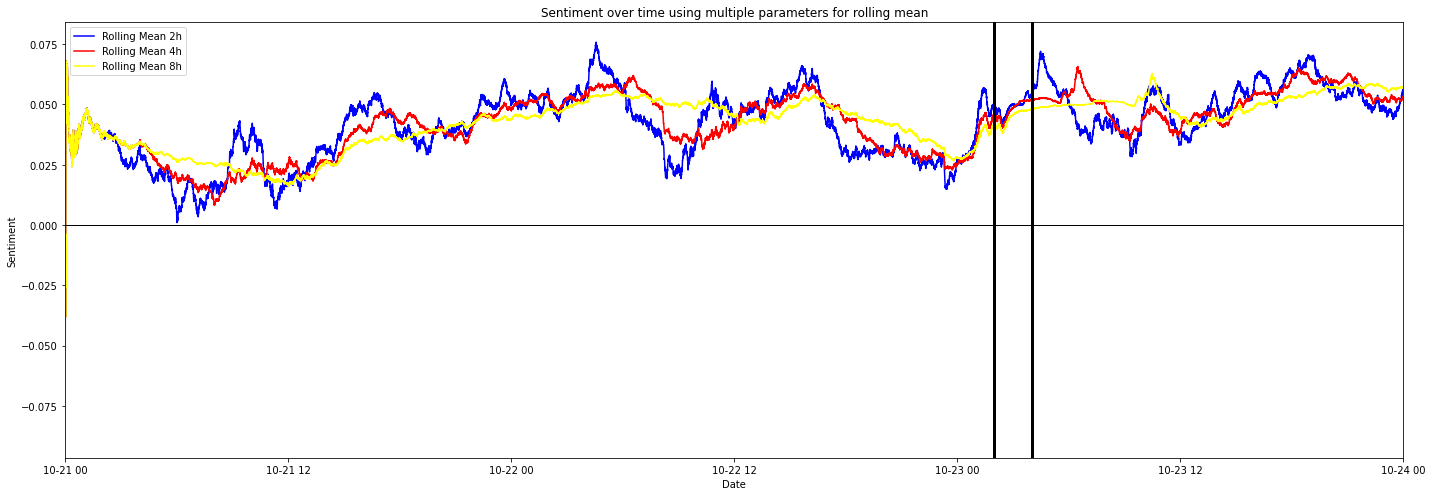

In [ ]:
#Plot sentiment over time using different parameters for the full dataset
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
#ax.scatter(df2['tweet_date'],df2['Sentiment_d'], label='Tweet Sentiment')
ax.plot(df2['tweet_date'],df2['rolling_2h'], color ='blue', label='Rolling Mean 2h')
ax.plot(df2['tweet_date'],df2['rolling_4h'], color ='red', label='Rolling Mean 4h')
ax.plot(df2['tweet_date'],df2['rolling_8h'], color ='yellow', label='Rolling Mean 8h')
#ax.plot(df2['tweet_date'],df2['mean'], color='black', label='Expanding Mean', linestyle='dotted')
ax.set_xlim([dt.date(2020,10,21),dt.date(2020,10,24)])
ax.set(title='Sentiment over time using multiple parameters for rolling mean', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()

#Neutral sentiment
ax.axhline(y=0, linewidth=1, color='black')

#Debate was from 02:00 GMT to 04:00 GMT on 23st of october
ax.axvline(x=dt.datetime(2020,10,23,2), linewidth=3, color='black')
ax.axvline(x=dt.datetime(2020,10,23,4), linewidth=3, color='black')

plt.show()

#### Trump vs Biden

In [ ]:
df_biden['rolling_4h'] = df_biden['Sentiment_d'].rolling('4h').mean() 
df_biden['rolling_8h'] = df_biden['Sentiment_d'].rolling('8h').mean() 

df_trump['rolling_4h'] = df_trump['Sentiment_d'].rolling('4h').mean()
df_trump['rolling_8h'] = df_trump['Sentiment_d'].rolling('8h').mean()

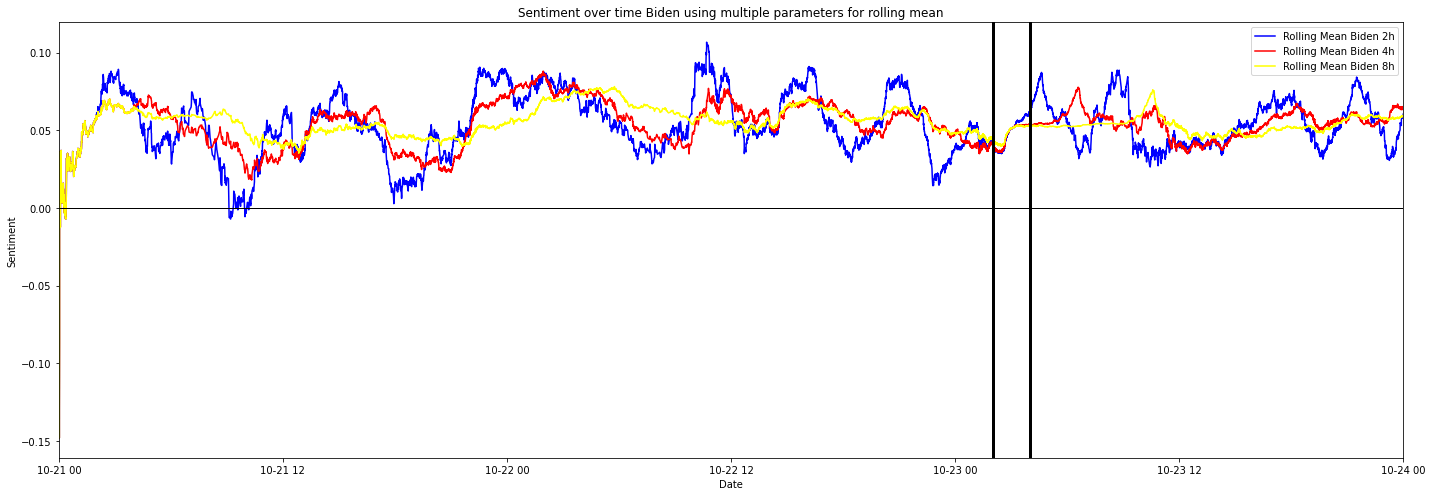

In [ ]:
#Plot sentiment over time for Biden using different parameters for the rolling mean
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
#ax.scatter(df2['tweet_date'],df2['Sentiment_d'], label='Tweet Sentiment')
ax.plot(df_biden['tweet_date'],df_biden['rolling_2h'], color ='blue', label='Rolling Mean Biden 2h')
ax.plot(df_biden['tweet_date'],df_biden['rolling_4h'], color ='red', label='Rolling Mean Biden 4h')
ax.plot(df_biden['tweet_date'],df_biden['rolling_8h'], color ='yellow', label='Rolling Mean Biden 8h')

ax.set_xlim([dt.date(2020,10,21),dt.date(2020,10,24)])
ax.set(title='Sentiment over time Biden using multiple parameters for rolling mean', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()

#Debate was from 02:00 GMT to 04:00 GMT on 23st of october
ax.axvline(x=dt.datetime(2020,10,23,2), linewidth=3, color='black')
ax.axvline(x=dt.datetime(2020,10,23,4), linewidth=3, color='black')

#Neutral sentiment
ax.axhline(y=0, linewidth=1, color='black')

plt.show()

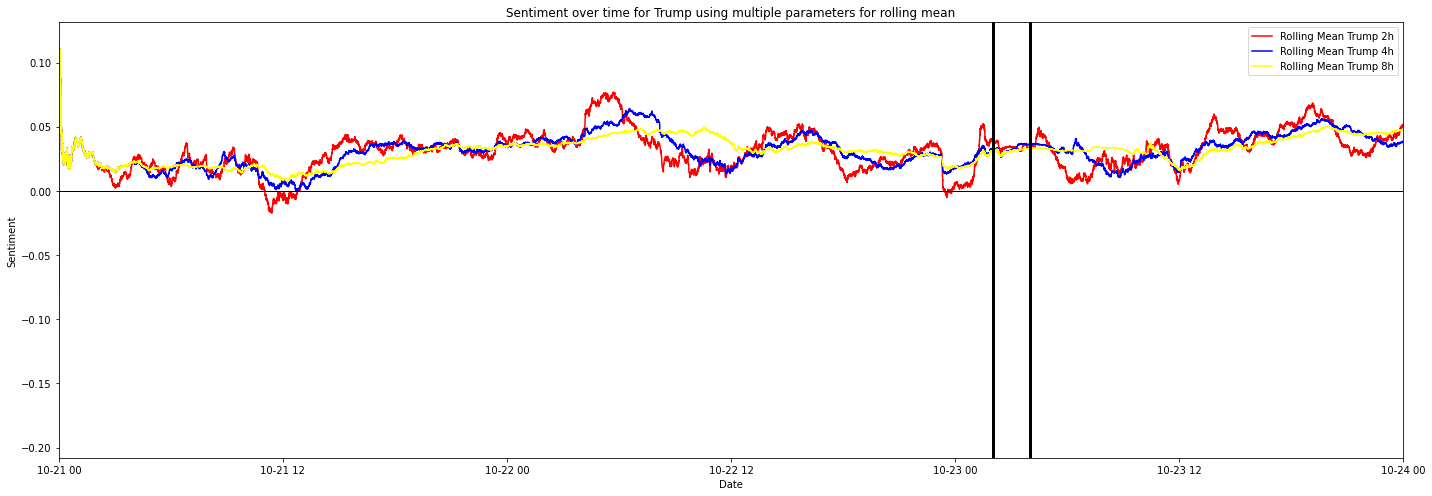

In [ ]:
#Plot sentiment over time for Trump using different parameters for the rolling mean
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
#ax.scatter(df2['tweet_date'],df2['Sentiment_d'], label='Tweet Sentiment')
ax.plot(df_trump['tweet_date'],df_trump['rolling_2h'], color ='red', label='Rolling Mean Trump 2h')
ax.plot(df_trump['tweet_date'],df_trump['rolling_4h'], color ='blue', label='Rolling Mean Trump 4h')
ax.plot(df_trump['tweet_date'],df_trump['rolling_8h'], color ='yellow', label='Rolling Mean Trump 8h')

ax.set_xlim([dt.date(2020,10,21),dt.date(2020,10,24)])
ax.set(title='Sentiment over time for Trump using multiple parameters for rolling mean', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()

#Debate was from 02:00 GMT to 04:00 GMT on 23st of october
ax.axvline(x=dt.datetime(2020,10,23,2), linewidth=3, color='black')
ax.axvline(x=dt.datetime(2020,10,23,4), linewidth=3, color='black')

#Neutral sentiment
ax.axhline(y=0, linewidth=1, color='black')

plt.show()

Controlling for multiple parameters for the rolling mean in the overall dataset and the dataset for Trump and Biden does not change our general conclusions. By increasing the rolling mean time parameter, the volatility decreases, but does not alter the general conclusions of our research. For Biden the drop in sentiment just before the debate seems to be mostly due to tweets in the hours before the debate and dissapears as soon as the parameter was increased. 

### Conclusion

In conclusion, we used public tweet data to perform an analysis on the sentiments towards the ongoing US presidential elections and the two candidats. Specifically, around one of the main events, namely the last presidential debate. 

Firstly, it is worth mentioning that tweet data is elaborate and this method of data gathering can be used for extensive analyses on a broad range of topics. The provided code can assist students in setting up such an analysis. 

Secondly, in our specific analysis we see that we can answer the research questions with the data and methods adopted. The sentiment analysis shows an overall more positive sentiment towards Joe Biden for various specifications. 
More specificly, when looking at the time series data Joe Biden has a higher sentiment, suggesting that English tweets are relatively more positive of him, as opposed to Donald Trump. This is also true when zooming in on the debate itself. Lastly, if we look at the ratio of positive to total tweets, as applied in Ramteke et al. (2016), we see that Biden has a higher ratio for Two of the three days. Therefore we can conclude that sentiments are more positive towards Joe Biden for various specifications. 

Thirdly, when adopting different parameters for the time series models, specifically for the rolling means, we see that the conclusions remain the same. The biggest difference is a lower volatility and that some of the specific spikes are reduced, as these are only there for a short period of time. The overall trend remains more positive towards Biden.

